In [14]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import numpy as np 
import matplotlib.pyplot as plt

# Vector Space model Intuition 

**A deeper look inside content**
- We always start a discussion about word embedding with a review of disadvantages of bag of words representation of documents.
    - Loss of context  
    - Dimensionality explosion
    - Sparcity of data 
    - Difficulty with Synonymy and Polysemy 
    - Computational efficiency 

**The basic idea behind word embedding**
- We learn a word from nearby words.
    - The idea goes back to language philosopher Ludwig Wittgenstein.
- Algorithms coducting word embedding have the task to predict the next potential words.
    - They try to minimize the error of predicting the next word.


**Types of Algorithms**
- Latent Semantic Analysis
- Neural word embedding
- Pretrained Embeddings
- Embedding in Large Language Models (LLM)

**Latent Semantic Analysis**
- Based on truncated singular-value decomposition
- It considers a whole document as the window.
- 


**Neural Word Embedding**
- 
- 

**Pretrained Embeddings**
- 
- 

**Embedding in Large Language Models**
- 
- 

# Some word embedding models

**We check three embedding algorithm**
- Word2vec
- GloVe
- FastText

---
---

**Word2Vec**

In [4]:
# Sample corpus
sentences = [
    ['this', 'is', 'a', 'sample', 'sentence'],
    ['word2vec', 'embeds', 'words', 'into', 'vectors'],
    ['deep', 'learning', 'is', 'fun'],
    ['we', 'use', 'word', 'embeddings', 'in', 'NLP']
]

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Access the vector of a word
vector = model.wv['word2vec']

print(f"Vector for 'word2vec':\n{vector}")

Vector for 'word2vec':
[ 8.13227147e-03 -4.45733406e-03 -1.06835726e-03  1.00636482e-03
 -1.91113955e-04  1.14817743e-03  6.11386076e-03 -2.02715401e-05
 -3.24596534e-03 -1.51072862e-03  5.89729892e-03  1.51410222e-03
 -7.24261976e-04  9.33324732e-03 -4.92128357e-03 -8.38409644e-04
  9.17541143e-03  6.74942741e-03  1.50285603e-03 -8.88256077e-03
  1.14874600e-03 -2.28825561e-03  9.36823711e-03  1.20992784e-03
  1.49006362e-03  2.40640994e-03 -1.83600665e-03 -4.99963388e-03
  2.32429506e-04 -2.01418041e-03  6.60093315e-03  8.94012302e-03
 -6.74754381e-04  2.97701475e-03 -6.10765442e-03  1.69932481e-03
 -6.92623248e-03 -8.69402662e-03 -5.90020278e-03 -8.95647518e-03
  7.27759488e-03 -5.77203138e-03  8.27635173e-03 -7.24354526e-03
  3.42167495e-03  9.67499893e-03 -7.78544787e-03 -9.94505733e-03
 -4.32914635e-03 -2.68313056e-03 -2.71289347e-04 -8.83155130e-03
 -8.61755759e-03  2.80021061e-03 -8.20640661e-03 -9.06933658e-03
 -2.34046578e-03 -8.63180775e-03 -7.05664977e-03 -8.40115082e-03
 -

In [5]:
# Find and print the most similar words
similar_words = model.wv.most_similar('word2vec', topn=5)
print("Top 5 words similar to 'word2vec':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Top 5 words similar to 'word2vec':
word: 0.1638
into: 0.1460
this: 0.0748
in: 0.0505
a: 0.0416


In [17]:
# Load pre-trained Word2Vec model (Google News vectors - ~1.5GB)
model_path = '../../corpusExample/data/GoogleNews-vectors-negative300.bin.gz'

model = KeyedVectors.load_word2vec_format(model_path, binary=True)

# Get top 5 similar words to "Law"
similar_words = model.most_similar('law', topn=5)

# Print them
print("Top 5 words similar to 'Law':")
for word, score in similar_words:
    print(f"{word}: {score:.3f}")

Top 5 words similar to 'Law':
laws: 0.740
statute: 0.676
statutes: 0.670
Law: 0.611
legislation: 0.580


---
---

**GloVe**

# Visualizing Embeddings 

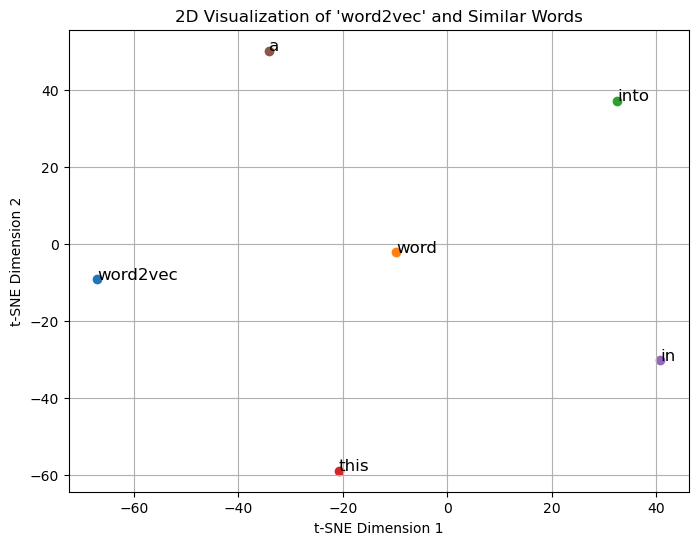

In [13]:
# Sample corpus
sentences = [
    ['this', 'is', 'a', 'sample', 'sentence'],
    ['word2vec', 'embeds', 'words', 'into', 'vectors'],
    ['deep', 'learning', 'is', 'fun'],
    ['we', 'use', 'word', 'embeddings', 'in', 'NLP']
]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get most similar words to "word2vec"
target_word = 'word2vec'
similar_words = model.wv.most_similar(target_word, topn=5)

# Include the target word itself
words = [target_word] + [word for word, _ in similar_words]
vectors = [model.wv[word] for word in words]

# Convert to NumPy array for t-SNE
vectors_np = np.array(vectors)

# Reduce vectors to 2D
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
vectors_2d = tsne.fit_transform(vectors_np)

# Plot
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    x, y = vectors_2d[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)

plt.title(f"2D Visualization of '{target_word}' and Similar Words")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()